# Exploratory Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/colby/OneDrive/Documents/SCMS_Delivery_History_Dataset_reduced.csv", encoding='latin1')

print(df.head())
print(df.shape)
print(df.info())

         Country  Fulfill Via Vendor INCO Term Shipment Mode  \
0  Côte d'Ivoire  Direct Drop              EXW           Air   
1        Vietnam  Direct Drop              EXW           Air   
2  Côte d'Ivoire  Direct Drop              FCA           Air   
3        Vietnam  Direct Drop              EXW           Air   
4        Vietnam  Direct Drop              EXW           Air   

  Scheduled Delivery Date Delivered to Client Date Product Group  \
0                2-Jun-06                 2-Jun-06          HRDT   
1               14-Nov-06                14-Nov-06           ARV   
2               27-Aug-06                27-Aug-06          HRDT   
3                1-Sep-06                 1-Sep-06           ARV   
4               11-Aug-06                11-Aug-06           ARV   

  Sub Classification                                             Vendor  \
0           HIV test                        RANBAXY Fine Chemicals LTD.   
1          Pediatric                           Aurobindo

In [3]:
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])

df['Delayed Shipment'] = np.where(df['Delivered to Client Date'] > df['Scheduled Delivery Date'], 1, 0)

df.drop(['Scheduled Delivery Date', 'Delivered to Client Date'], axis=1, inplace=True)

print(df['Delayed Shipment'].value_counts(normalize=True))

0    0.885122
1    0.114878
Name: Delayed Shipment, dtype: float64


In [4]:
df.head()

,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Delayed Shipment
0,Côte d'Ivoire,Direct Drop,EXW,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN,0
1,Vietnam,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN,0
2,Côte d'Ivoire,Direct Drop,FCA,Air,HRDT,HIV test,Abbott GmbH & Co. KG,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN,0
3,Vietnam,Direct Drop,EXW,Air,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN,0
4,Vietnam,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN,0


### Missing Values

In [5]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Country                        0
Fulfill Via                    0
Vendor INCO Term               0
Shipment Mode                360
Product Group                  0
Sub Classification             0
Vendor                         0
Line Item Quantity             0
Line Item Value                0
Pack Price                     0
Unit Price                     0
Manufacturing Site             0
First Line Designation         0
Weight (Kilograms)             0
Freight Cost (USD)             0
Line Item Insurance (USD)    287
Delayed Shipment               0
dtype: int64


## Target Distribution

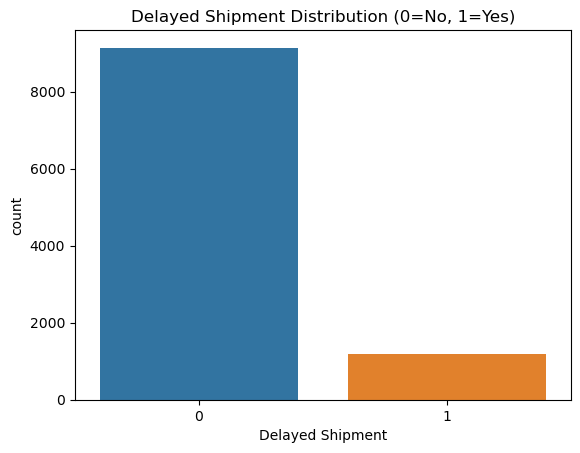

In [6]:
sns.countplot(x='Delayed Shipment', data=df)
plt.title('Delayed Shipment Distribution (0=No, 1=Yes)')
plt.show()

## Interval Feature Distributions & Box Plots

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight (Kilograms)  6372 non-null   float64
 1   Freight Cost (USD)  6198 non-null   float64
dtypes: float64(2)
memory usage: 161.4 KB
None


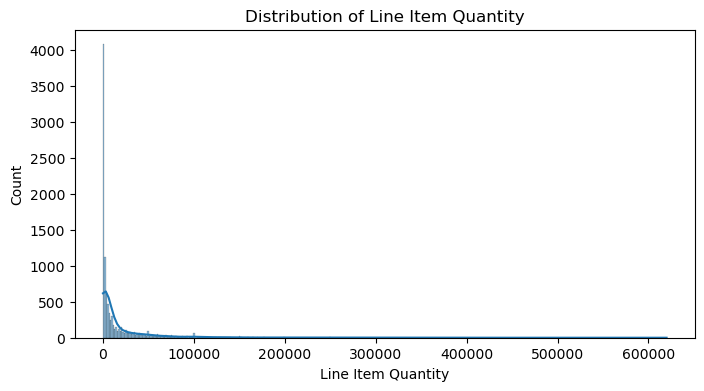

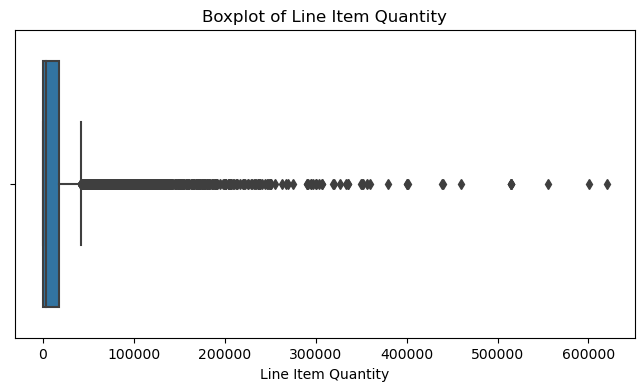

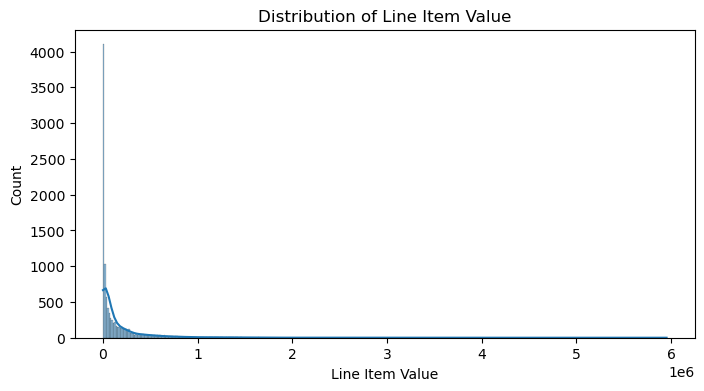

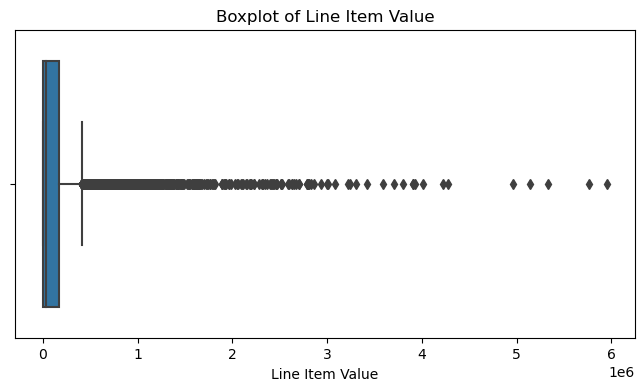

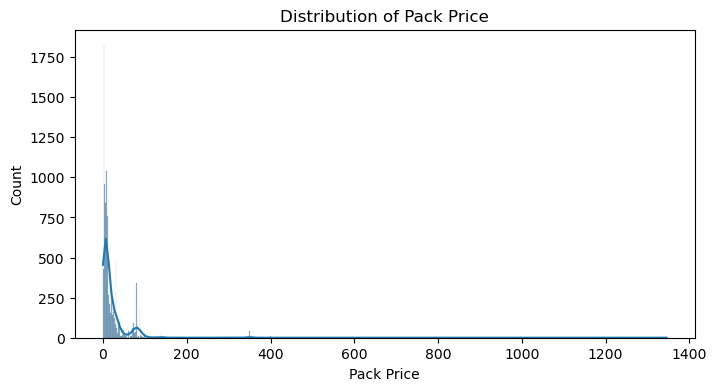

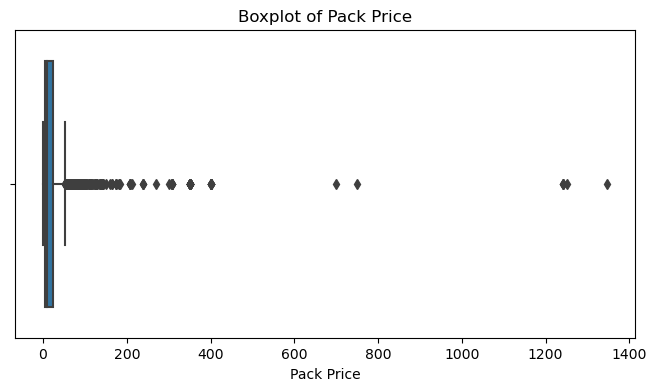

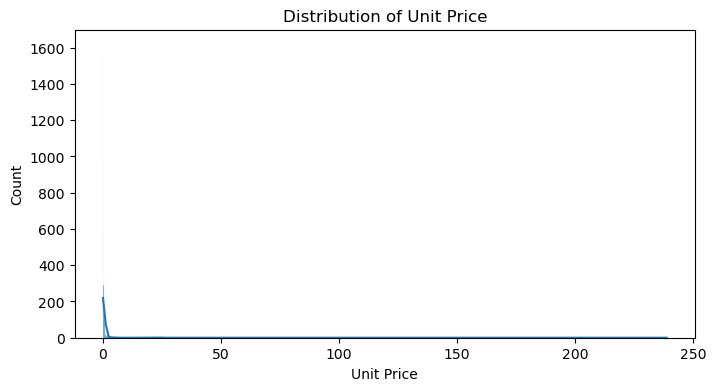

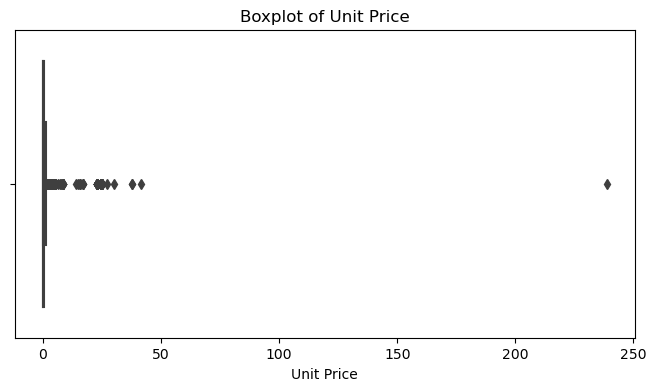

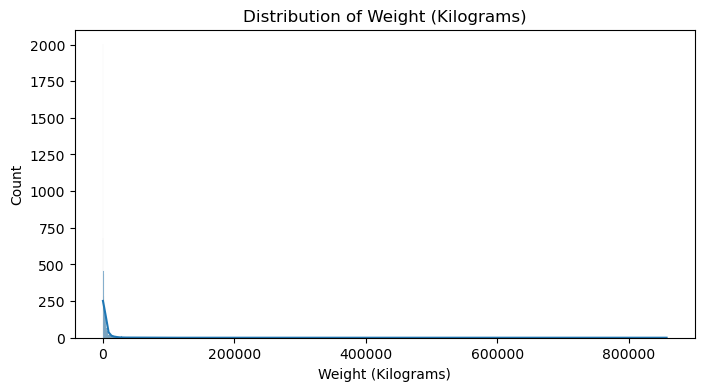

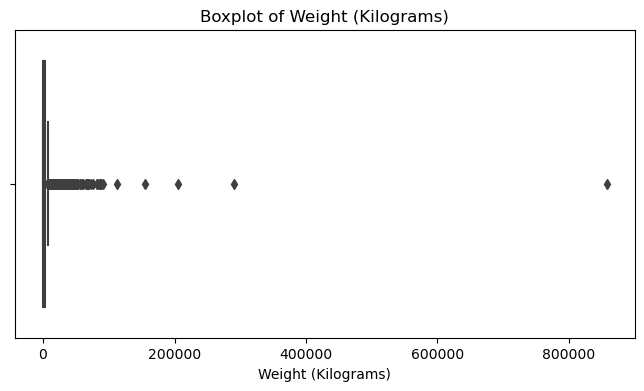

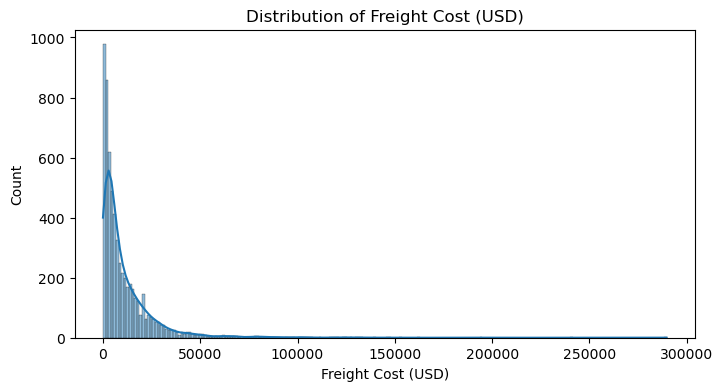

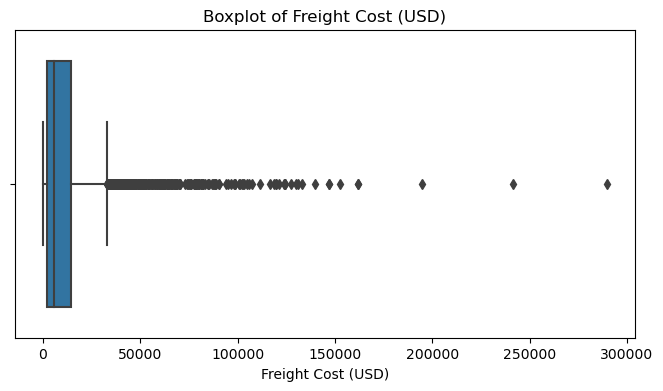

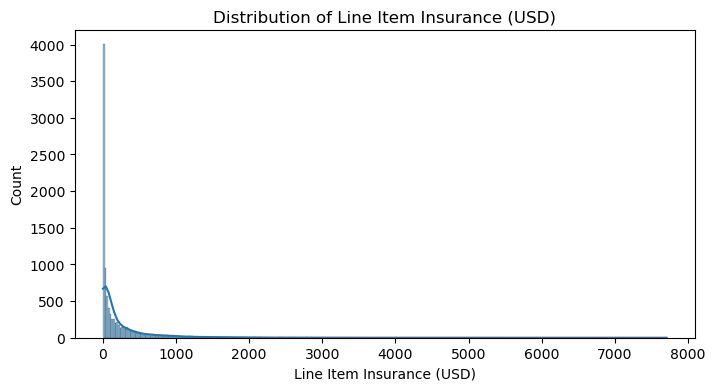

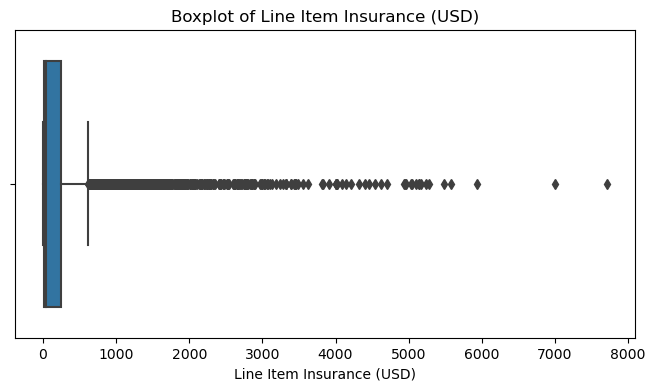

NameError: name 'numerical_cols' is not defined

In [7]:
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')

df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

print(df[['Weight (Kilograms)', 'Freight Cost (USD)']].info())

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

numeric_cols.remove('Delayed Shipment')

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Distribution of Categorical Variables

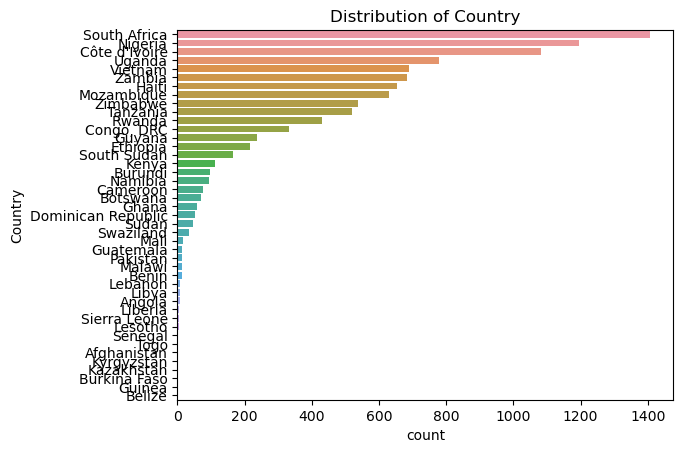

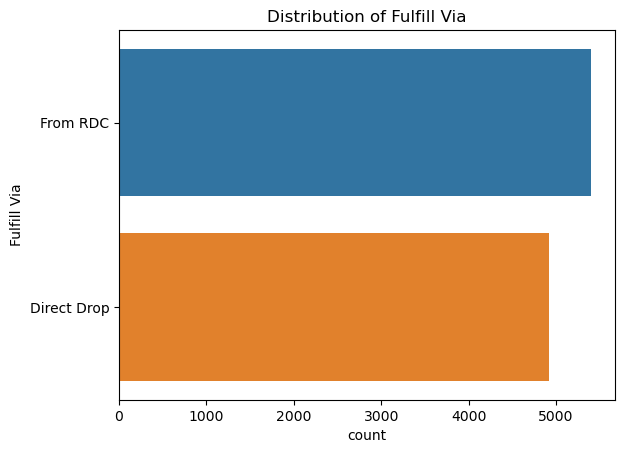

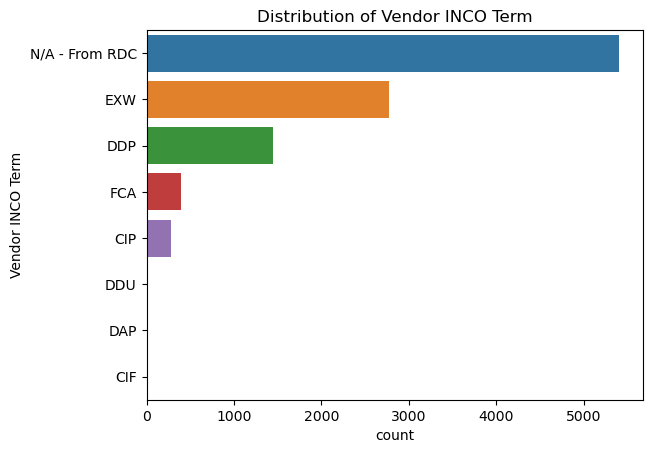

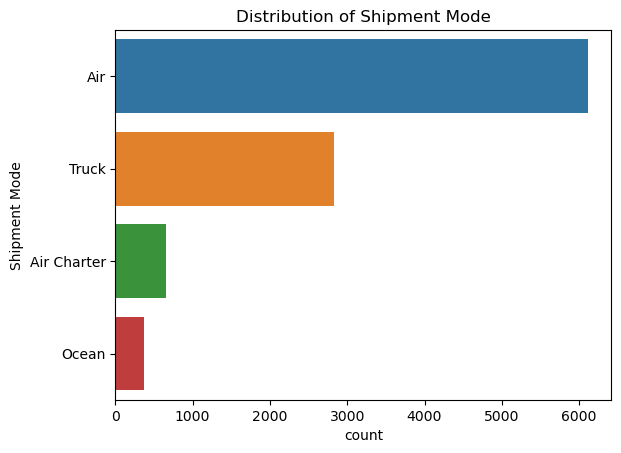

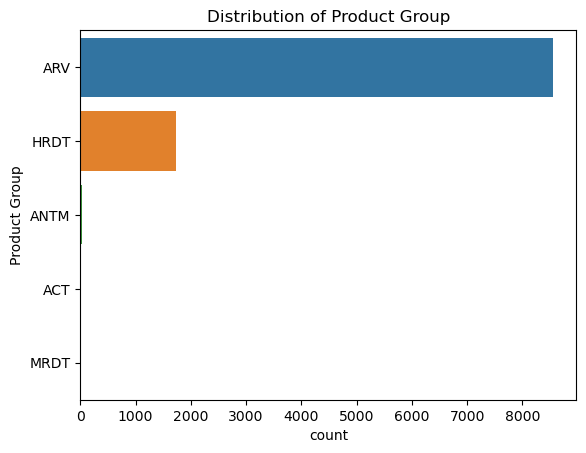

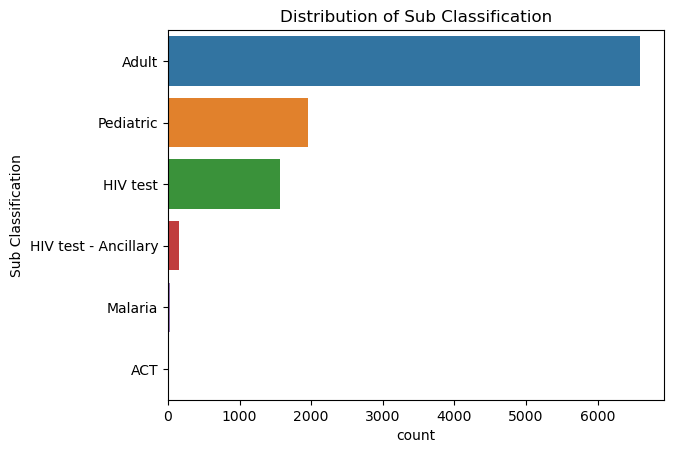

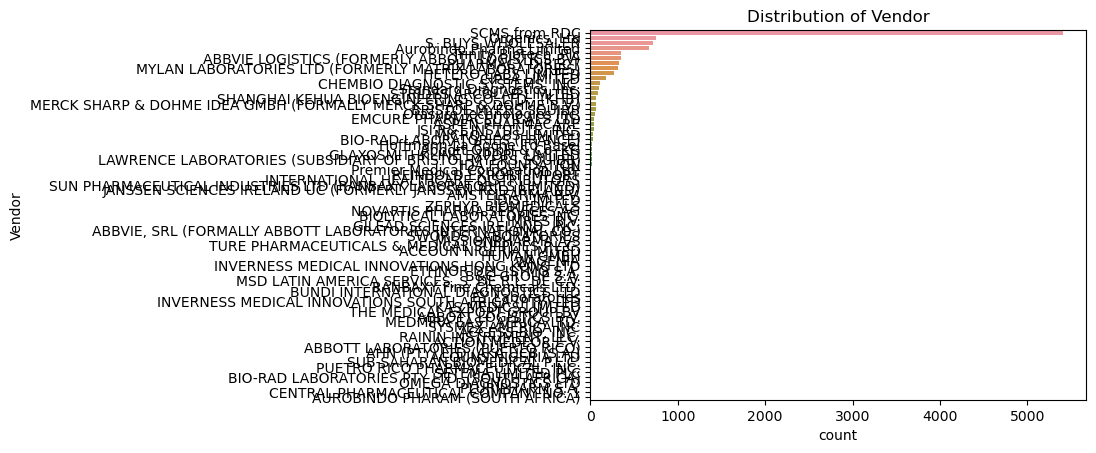

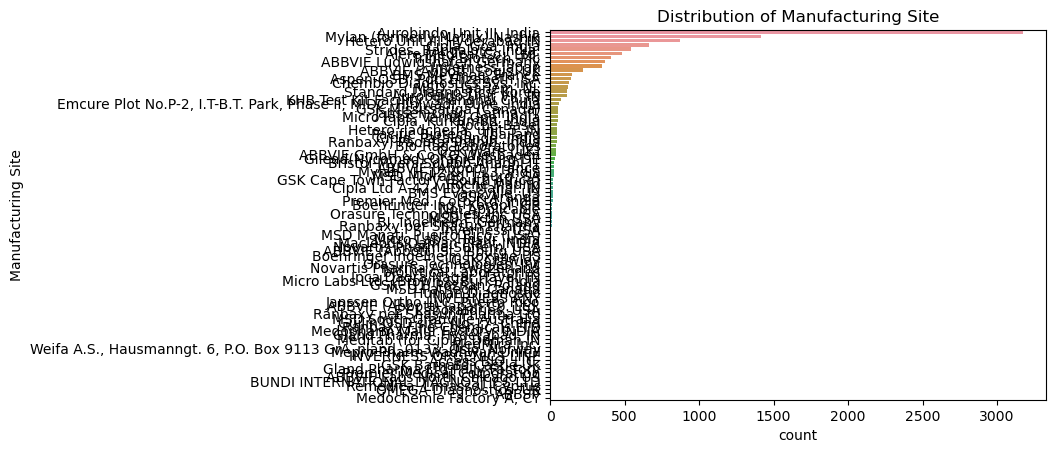

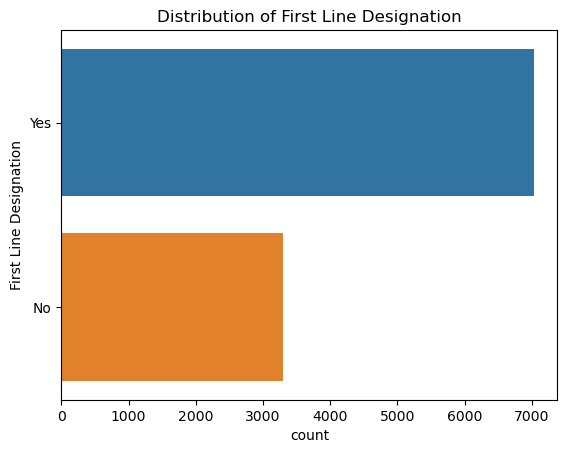

In [10]:
categorical_values = df.select_dtypes(include=['object']).columns
for col in categorical_values:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

## Analyze Distribution of Target within Variables

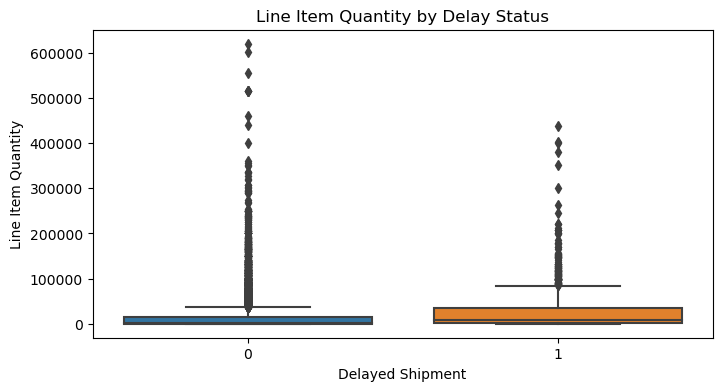

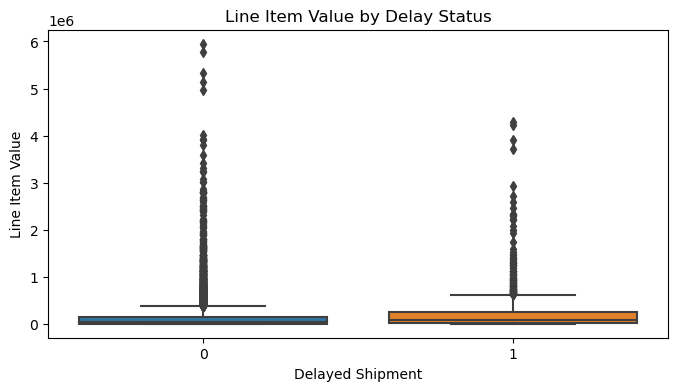

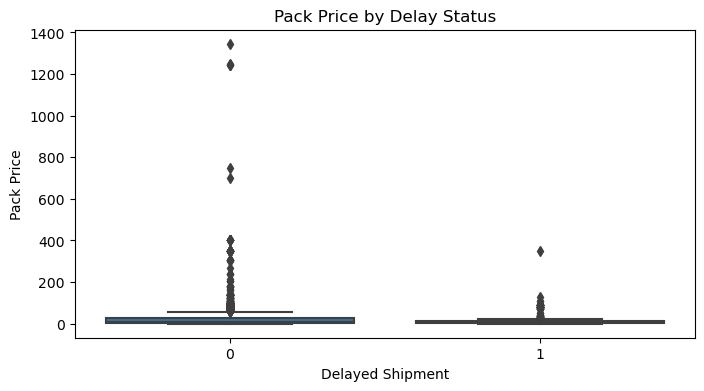

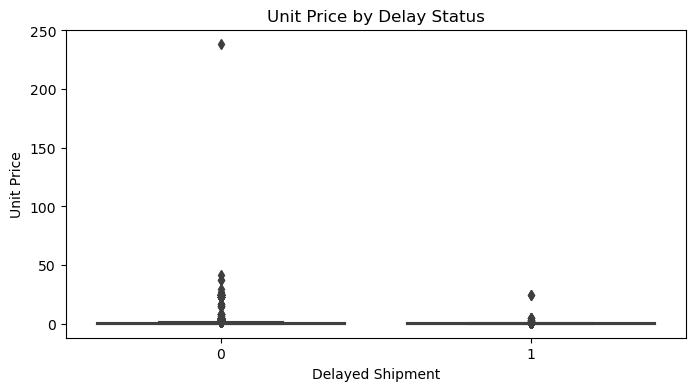

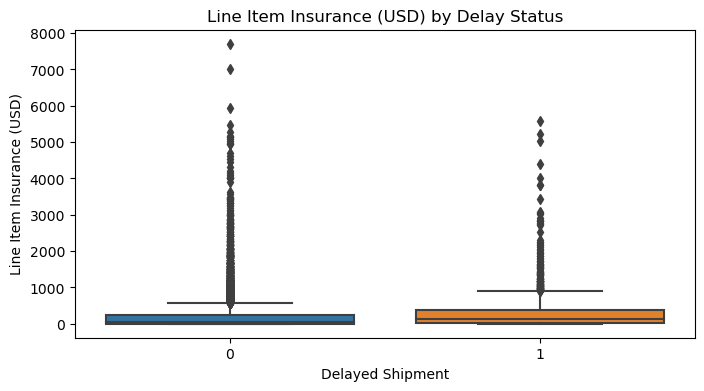

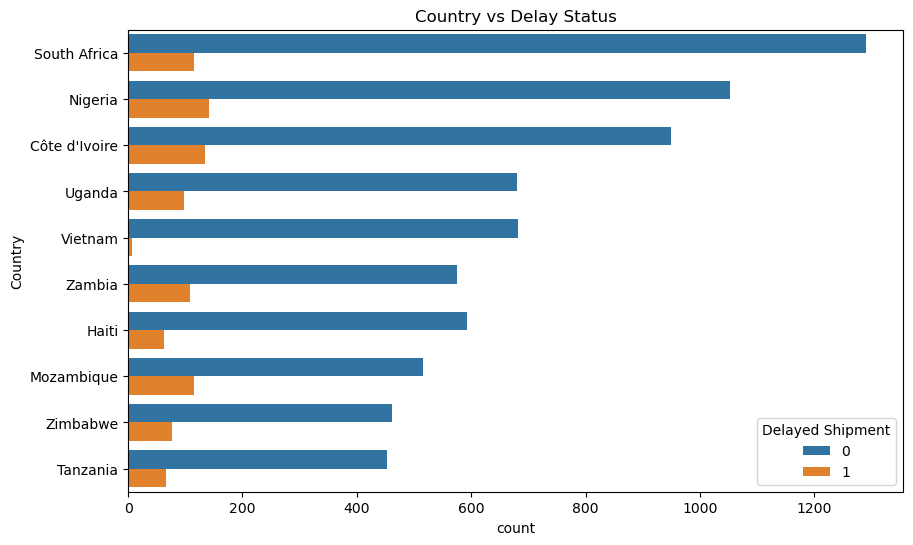

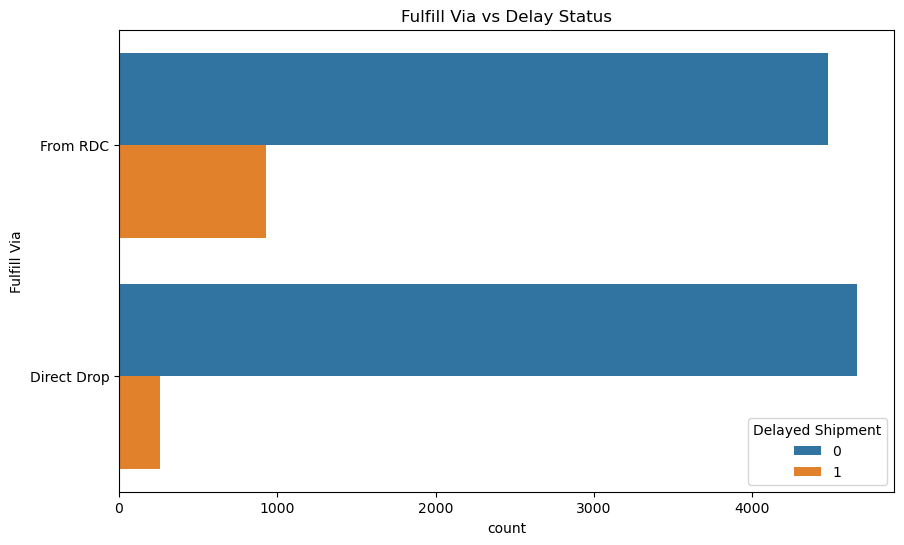

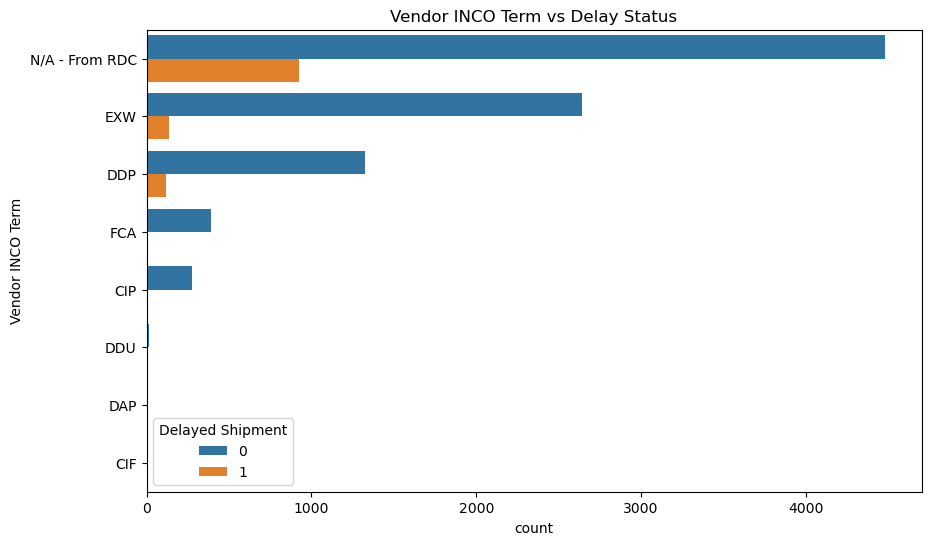

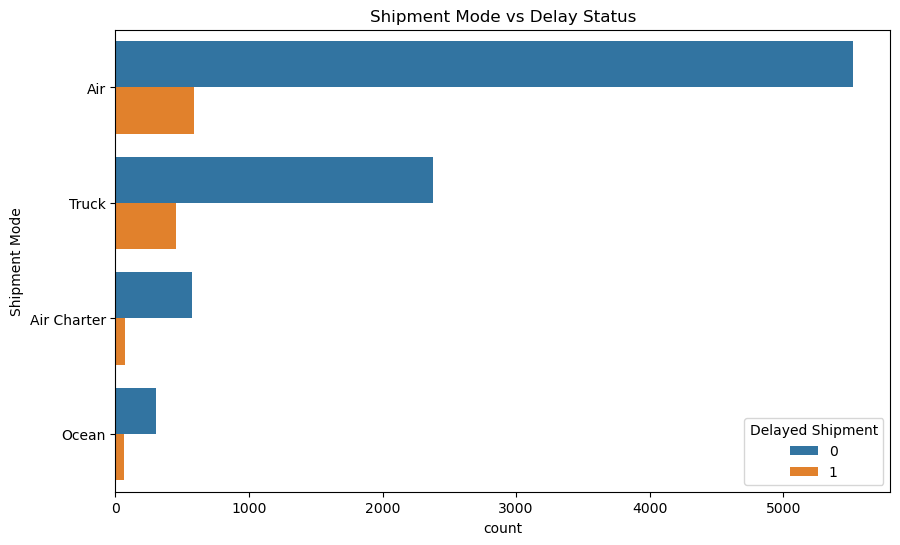

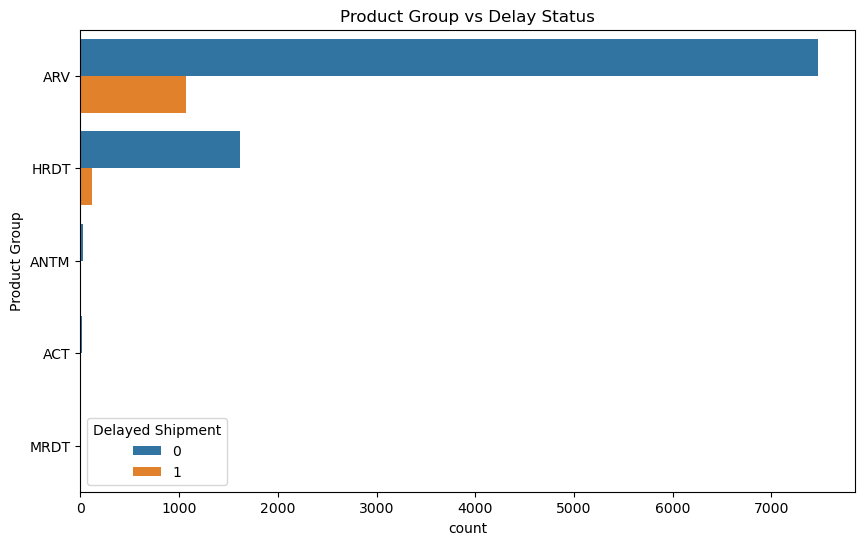

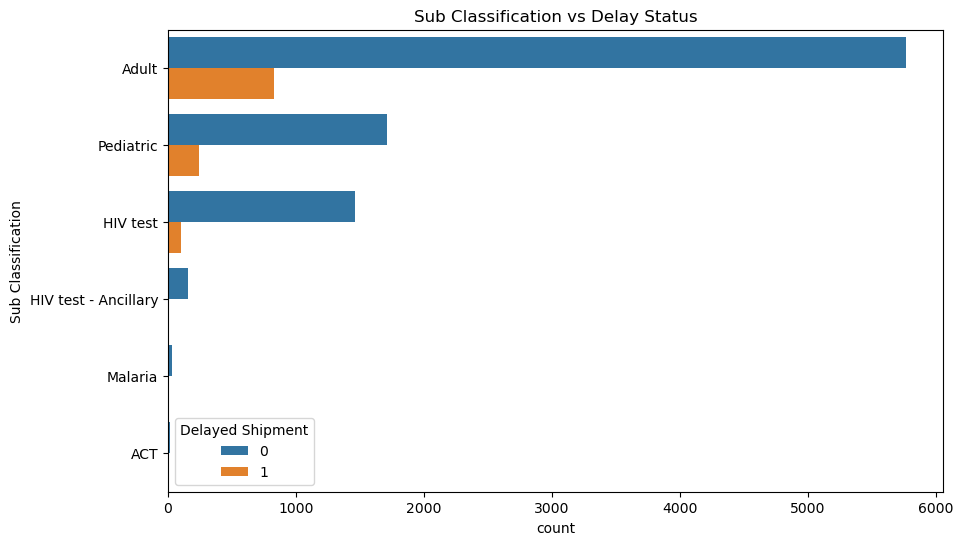

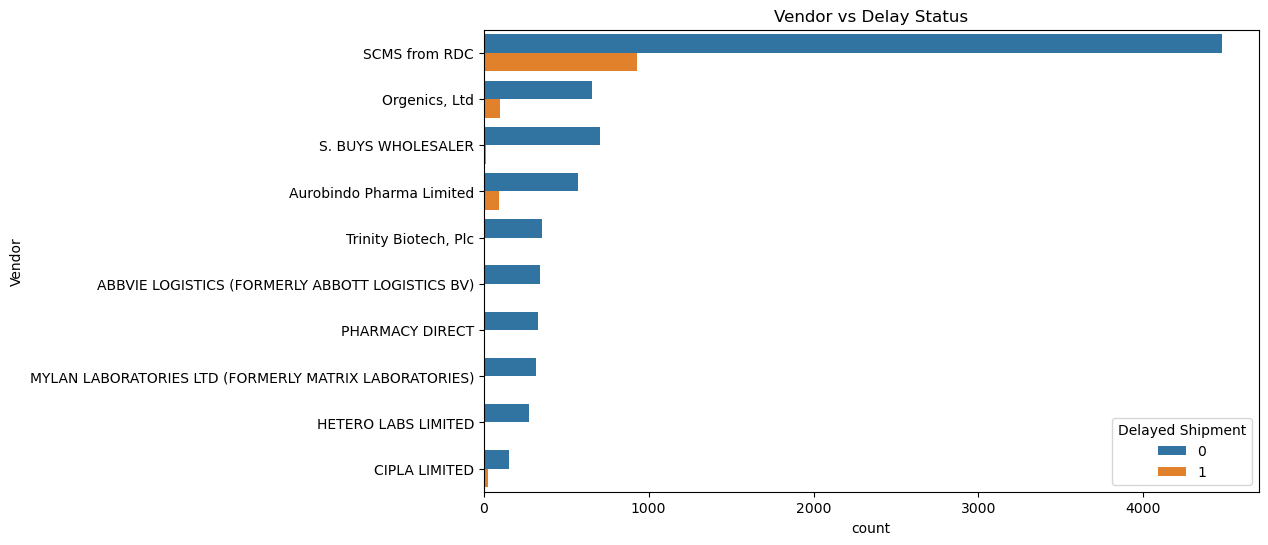

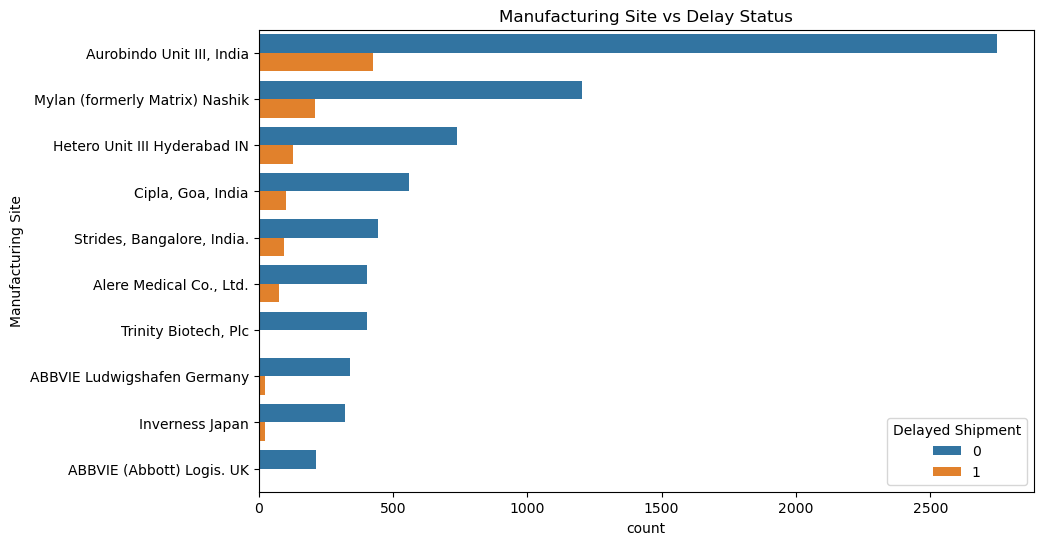

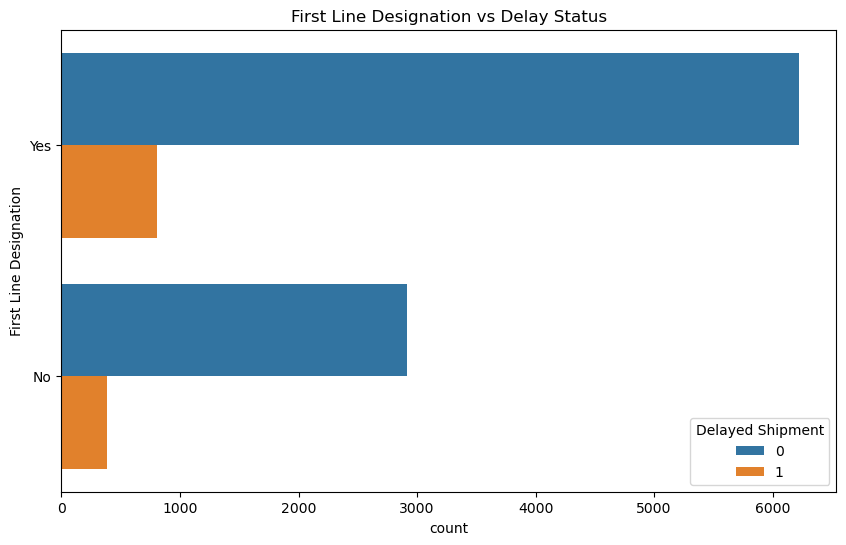

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Delayed Shipment', y=col, data=df)
    plt.title(f'{col} by Delay Status')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, hue='Delayed Shipment', data=df,
                  order=df[col].value_counts().iloc[:10].index)
    plt.title(f'{col} vs Delay Status')
    plt.show()

## Correlation Map of Interval Variables

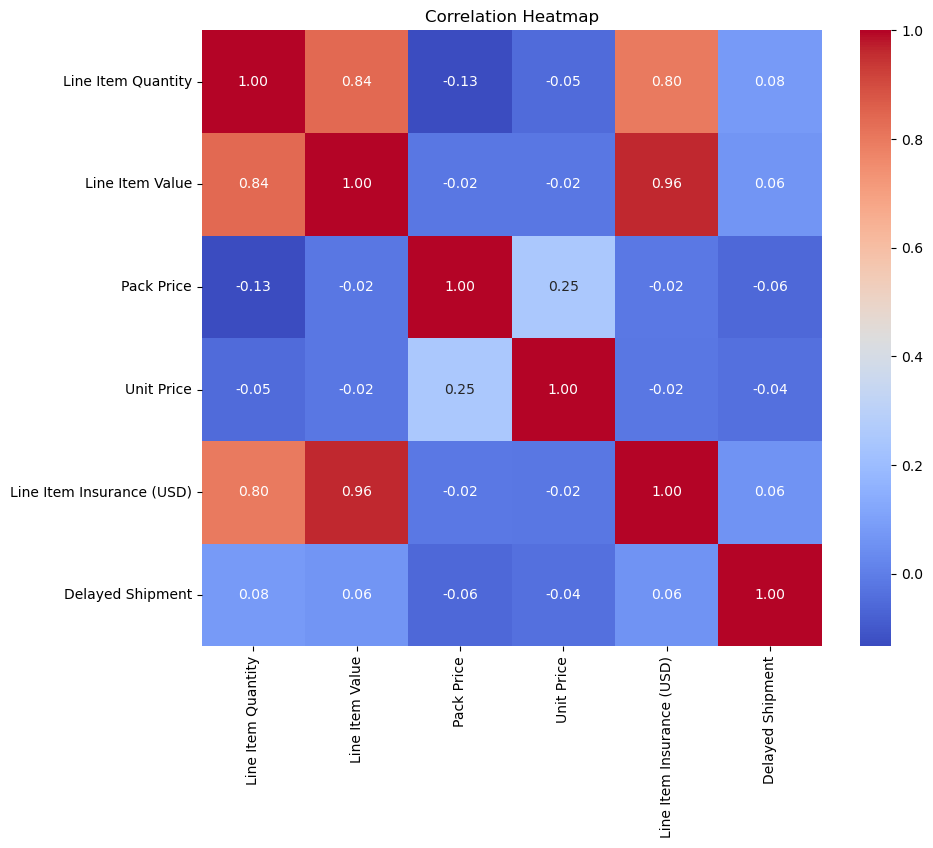

In [14]:

plt.figure(figsize=(10, 8))
corr = df[numeric_cols + ['Delayed Shipment']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Summary Statistics

In [17]:
import pandas as pd

numeric_cols = df.select_dtypes(include=['number'])

summary_stats = numeric_cols.describe()

skewness = numeric_cols.skew(numeric_only=True)
kurtosis = numeric_cols.kurtosis(numeric_only=True)

summary_df = pd.DataFrame({
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Standard Deviation': numeric_cols.std(),
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max(),
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

display(summary_df) 

summary_df.to_csv("summary_statistics.csv")

,Mean,Median,Standard Deviation,Min,Max,Skewness,Kurtosis
Line Item Quantity,18332.534870,3000.000,40035.302961,1.00,619999.00,5.038315,40.050300
Line Item Value,157650.567347,30471.465,345292.066979,0.00,5951990.40,5.837020,54.152430
Pack Price,21.910241,9.300,45.609223,0.00,1345.64,12.988432,293.176204
Unit Price,0.611701,0.160,3.275808,0.00,238.65,40.584849,2725.960252
Weight (Kilograms),3424.441306,1047.000,13526.968270,0.00,857354.00,42.505903,2538.174124
Freight Cost (USD),11103.234819,5869.655,15813.026692,0.75,289653.20,4.688023,41.054884
Line Item Insurance (USD),240.117626,47.040,500.190568,0.00,7708.44,4.827162,34.911215
Delayed Shipment,0.114878,0.000,0.318890,0.00,1.00,2.415859,3.837117


## Pairwise Feature Distributions

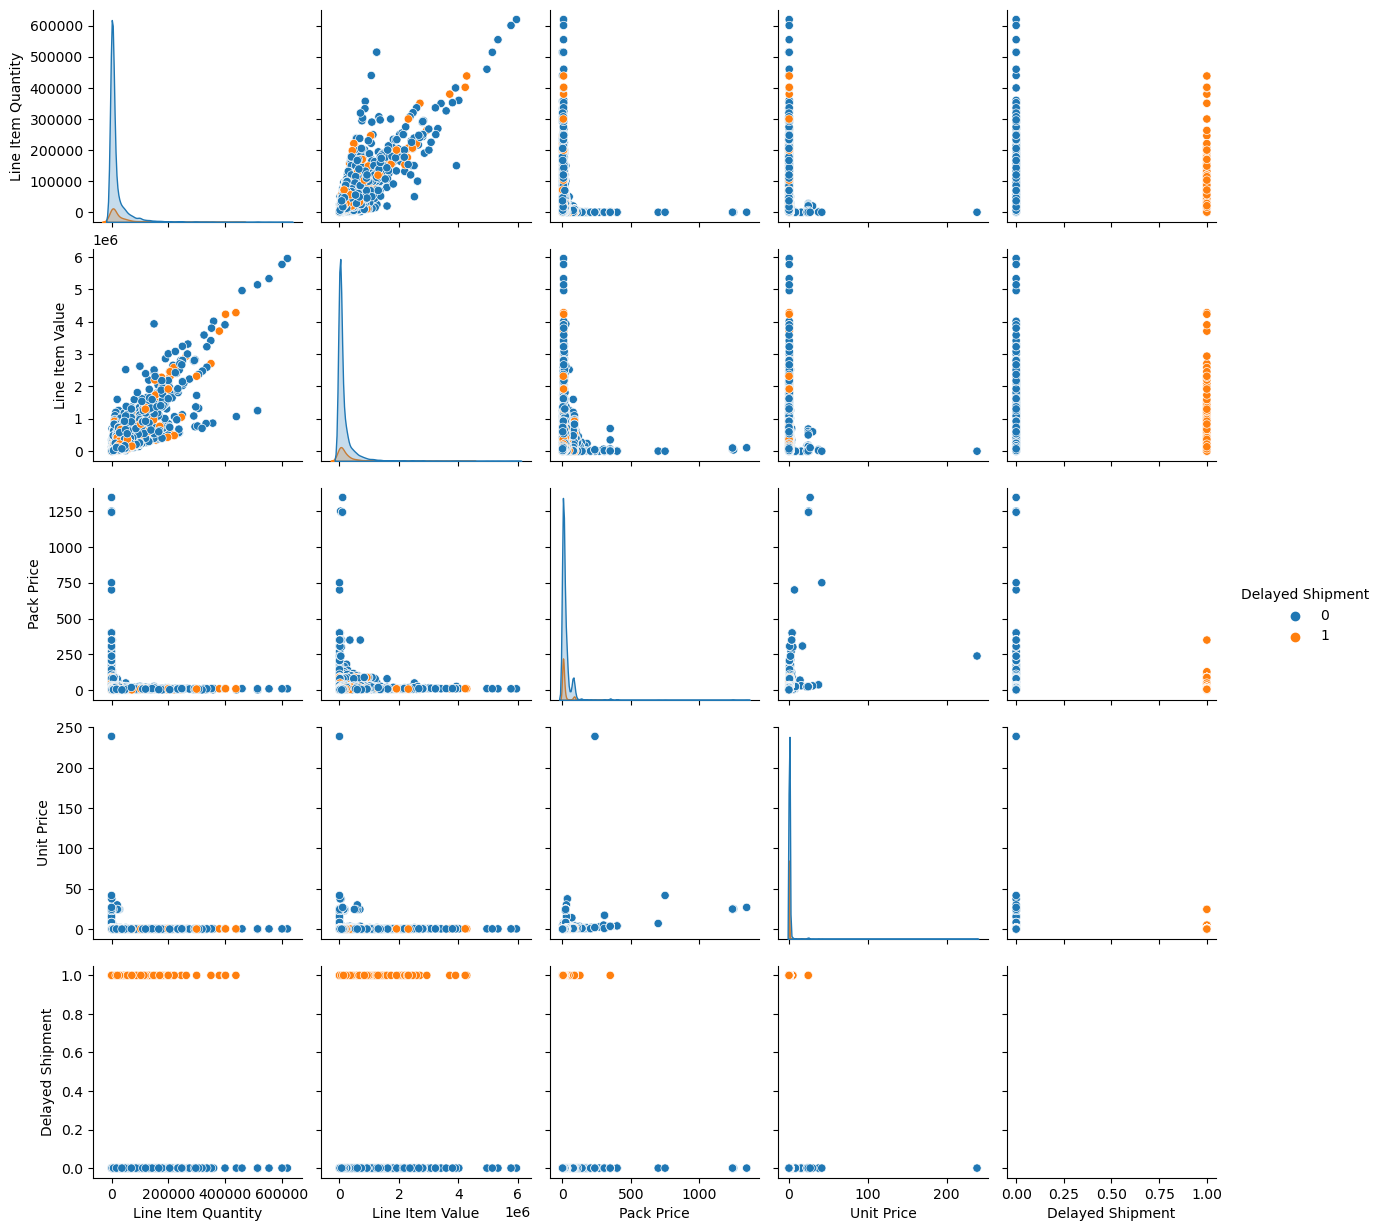

In [18]:
sns.pairplot(df, vars=['Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Delayed Shipment'], hue='Delayed Shipment')
plt.show()


## Chi-Squared Tests for Categorical Variables

In [11]:
from scipy.stats import chi2_contingency

categorical_cols = ['Country', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'Vendor', 'Manufacturing Site']
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Delayed Shipment'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'{col}: p-value = {p}')


Country: p-value = 2.6091962969053062e-45
Fulfill Via: p-value = 1.348494555981474e-79
Vendor INCO Term: p-value = 8.160697017761194e-79
Shipment Mode: p-value = 2.9764077995212937e-19
Vendor: p-value = 4.7951274735537043e-70
Manufacturing Site: p-value = 1.343497603871741e-31
